### Creating MySql database

In [1]:
import mysql.connector
from mysql.connector import Error

def create_connection(host_name, user_name, user_password):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password
        )
        print("Connection to MySQL DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

connection = create_connection("localhost", "root", "Aa050414*")

Connection to MySQL DB successful


In [2]:
def create_database(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        print("Database created successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

In [3]:
create_database_query = "CREATE DATABASE Online_shop"
create_database(connection, create_database_query)

Database created successfully


In [4]:
def create_connection(host_name, user_name, user_password, db_name):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password,
            database=db_name
        )
        print("Connection to MySQL DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

In [5]:
connection = create_connection("localhost", "root", "Aa050414*", "Online_shop")

Connection to MySQL DB successful


In [6]:
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

### Creating tables in MySql database

In [7]:
create_category_table = """
CREATE TABLE IF NOT EXISTS categories (
  id INT AUTO_INCREMENT, 
  name VARCHAR(50) NOT NULL, 
  description VARCHAR(250), 
  PRIMARY KEY (id)
) ENGINE = InnoDB
"""

execute_query(connection, create_category_table)

Query executed successfully


In [8]:
def executemany_query(connection, query, values):
    cursor = connection.cursor()
    try:
        cursor.executemany(query, values)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")
        
query = "INSERT INTO categories ( name, description ) VALUES ( %s, %s )"
values = [('men', 'men shoes'), ('women', 'women shoes'), ('kids', 'kids shoes')]
executemany_query(connection, query, values)

Query executed successfully


In [9]:
import json

with open('suppliers_json.json', 'r') as sh:
    suppliers = json.load(sh)

suppliers_list = []
for i in suppliers:
    supplier = []
    for k, j in i.items():
        if k != 'id':
            supplier.append(j)
    suppliers_list.append(tuple(supplier))
            
suppliers_list[0]    

('Carey-Gibson',
 'Jenny',
 'Marshall',
 '38722 Katrina Parks\nRyanfurt, WY 25337',
 'Lake Antonio',
 '0058698100601')

In [10]:
create_suppliers_table = """
CREATE TABLE IF NOT EXISTS suppliers (
  id INT AUTO_INCREMENT, 
  company VARCHAR(50) NOT NULL,
  name VARCHAR(50) NOT NULL,
  surname VARCHAR(50) NOT NULL, 
  address VARCHAR(100) NOT NULL, 
  city VARCHAR(50) NOT NULL,
  phone VARCHAR(50) NOT NULL,
  PRIMARY KEY (id)
) ENGINE = InnoDB
"""

execute_query(connection, create_suppliers_table)

Query executed successfully


In [11]:
query = "INSERT INTO suppliers ( company, name, surname, address, city, phone) VALUES ( %s, %s, %s, %s, %s, %s)"
executemany_query(connection, query, suppliers_list)

Query executed successfully


In [12]:
import numpy as np
from datetime import datetime, date

with open('products_json.json', 'r') as sh:
    products = json.load(sh)
products_list = []
for i in products:
    product = []
    for k , j in i.items():
        if k == 'price':
            product.append(float(j))
        elif k == 'date':
            date_split = j.split('-')
            product.append(date(int(date_split[0]), int(date_split[1]), int(date_split[2])))
        elif len(product) == 1:
            product.append(np.random.randint(1, 20))
            product.append(j)
        elif k == 'id':
            i[k] += 1
        else:
            product.append(j)
    product.append('Null')
    products_list.append(tuple(product))
        
products_list[0]

(1,
 3,
 'Reebok',
 'Classic Harman Run',
 33,
 32.91,
 19.75,
 'Black/True Grey/Chalk',
 datetime.date(2021, 10, 5),
 'https://m.media-amazon.com/images/I/71E0hBNpG5L._AC_SR255,340_.jpg',
 'Null')

In [13]:
create_products_table = """
CREATE TABLE IF NOT EXISTS products (
  id INT AUTO_INCREMENT, 
  category_id INT NOT NULL,
  supplier_id INT NOT NULL,
  brand VARCHAR(50) NOT NULL, 
  name VARCHAR(50) NOT NULL, 
  unit INT NOT NULL,
  price DECIMAL NOT NULL,
  cost DECIMAL NOT NULL,
  color VARCHAR(50) NOT NULL,
  get_date DATE NOT NULL,
  url VARCHAR(250),
  description VARCHAR(250),
  PRIMARY KEY (id),
  FOREIGN KEY fk_category_id (category_id) REFERENCES categories(id),
  FOREIGN KEY fk_supplier_id (supplier_id) REFERENCES suppliers(id)
) ENGINE = InnoDB
"""

execute_query(connection, create_products_table)

Query executed successfully


In [14]:
query = "INSERT INTO products ( category_id, supplier_id, brand, name, unit, price, cost, color, get_date, url, description) VALUES ( %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"
executemany_query(connection, query, products_list)

Query executed successfully


In [15]:
import json
with open('couriers_json.json', 'r') as sh:
    couriers = json.load(sh)

couriers_list = []
for i in couriers:
    courier = []
    for k, j in i.items():
        if k != 'id':
            courier.append(j)
    couriers_list.append(tuple(courier))
            
couriers_list[0]      

('John',
 'Middleton',
 '08759 Cheyenne Fork Suite 288\nSmithton, PA 09700',
 'Lake Sandrashire',
 '1452787485876')

In [16]:
create_couriers_table = """
CREATE TABLE IF NOT EXISTS couriers (
  id INT AUTO_INCREMENT, 
  name VARCHAR(50) NOT NULL,
  surname VARCHAR(50) NOT NULL, 
  address VARCHAR(100) NOT NULL, 
  city VARCHAR(50) NOT NULL,
  phone VARCHAR(50) NOT NULL,
  PRIMARY KEY (id)
) ENGINE = InnoDB
"""

execute_query(connection, create_couriers_table)

Query executed successfully


In [17]:
query = "INSERT INTO couriers ( name, surname, address, city, phone) VALUES ( %s, %s, %s, %s, %s)"
executemany_query(connection, query, couriers_list)

Query executed successfully


In [18]:
with open('users_json.json', 'r') as cr:
    users = json.load(cr)
users[0]

{'id': 0,
 'name': 'Jason',
 'surname': 'Ford',
 'address': '11876 David Lakes\nMoraleston, MD 59672',
 'city': 'North Toddfort',
 'phone': '2580856843867',
 'email': 'rsvDojzFd@gmail.com',
 'password': 'CnTYrtieHokq'}

In [19]:
from faker import Faker
fake = Faker()
users_list = []
for i in users:
    user = []
    for k, j in i.items():
        if k == 'id':
            k += '1'
        else:
            user.append(j)
    user.append(str(fake.date_between(start_date='-30d', end_date='now')))
    users_list.append(tuple(user))
            
users_list[0]  

('Jason',
 'Ford',
 '11876 David Lakes\nMoraleston, MD 59672',
 'North Toddfort',
 '2580856843867',
 'rsvDojzFd@gmail.com',
 'CnTYrtieHokq',
 '2021-12-02')

In [20]:
create_users_table = """
CREATE TABLE IF NOT EXISTS users (
  id INT AUTO_INCREMENT, 
  name VARCHAR(50) NOT NULL,
  surname VARCHAR(50) NOT NULL, 
  address VARCHAR(100) NOT NULL, 
  city VARCHAR(50) NOT NULL,
  phone VARCHAR(50) NOT NULL,
  email VARCHAR(50) NOT NULL,
  password VARCHAR(50) NOT NULL,
  date DATE NOT NULL,
  PRIMARY KEY (id)
) ENGINE = InnoDB
"""

execute_query(connection, create_users_table)

Query executed successfully


In [21]:
query = "INSERT INTO users (name, surname, address, city, phone, email, password, date) VALUES ( %s, %s, %s, %s, %s, %s, %s, %s)"
executemany_query(connection, query, users_list)

Query executed successfully


In [22]:
create_payment_types_table = """
CREATE TABLE IF NOT EXISTS payment_types (
  id INT AUTO_INCREMENT, 
  name VARCHAR(20) NOT NULL,
  description VARCHAR(250),
  PRIMARY KEY (id)
) ENGINE = InnoDB
"""

execute_query(connection, create_payment_types_table)

query = "INSERT INTO payment_types ( name, description ) VALUES ( %s, %s )"
values = [('Cash', 'Null'), ('Card', 'Null')]
executemany_query(connection, query, values)

Query executed successfully
Query executed successfully


In [23]:
create_payments_table = """
CREATE TABLE IF NOT EXISTS payments (
  id INT AUTO_INCREMENT, 
  payment_type_id INT NOT NULL,
  card_type VARCHAR(50), 
  card_number VARCHAR(50), 
  cardholder_name VARCHAR(50),
  card_mm_yy VARCHAR(50),
  card_cvv VARCHAR(50),
  PRIMARY KEY (id),
  FOREIGN KEY fk_payment_type_id (payment_type_id) REFERENCES payment_types(id)
) ENGINE = InnoDB
"""

execute_query(connection, create_payments_table)

Query executed successfully


In [24]:
create_orders_table = """
CREATE TABLE IF NOT EXISTS orders (
  id INT AUTO_INCREMENT, 
  user_id INT NOT NULL,
  payment_id INT NOT NULL,
  courier_id INT NOT NULL,
  delivery_address VARCHAR(100) NOT NULL, 
  delivery_city VARCHAR(50) NOT NULL, 
  recipient_phone VARCHAR(50) NOT NULL,
  total_payment DECIMAL NOT NULL,
  order_date DATE NOT NULL,
  PRIMARY KEY (id),
  FOREIGN KEY fk_user_id (user_id) REFERENCES users(id),
  FOREIGN KEY fk_payment_id (payment_id) REFERENCES payments(id),
  FOREIGN KEY fk_courier_id (courier_id) REFERENCES couriers(id)
) ENGINE = InnoDB
"""

execute_query(connection, create_orders_table)


Query executed successfully


In [25]:
create_order_details_table = """
CREATE TABLE IF NOT EXISTS order_details (
  id INT AUTO_INCREMENT,
  order_id INT NOT NULL,
  product_id INT NOT NULL,
  product_count INT NOT NULL,
  PRIMARY KEY (id),
  FOREIGN KEY fk_product_id (product_id) REFERENCES products(id),
  FOREIGN KEY fk_order_id (order_id) REFERENCES orders(id)
) ENGINE = InnoDB
"""

execute_query(connection, create_order_details_table)

Query executed successfully


### MySql database diagram

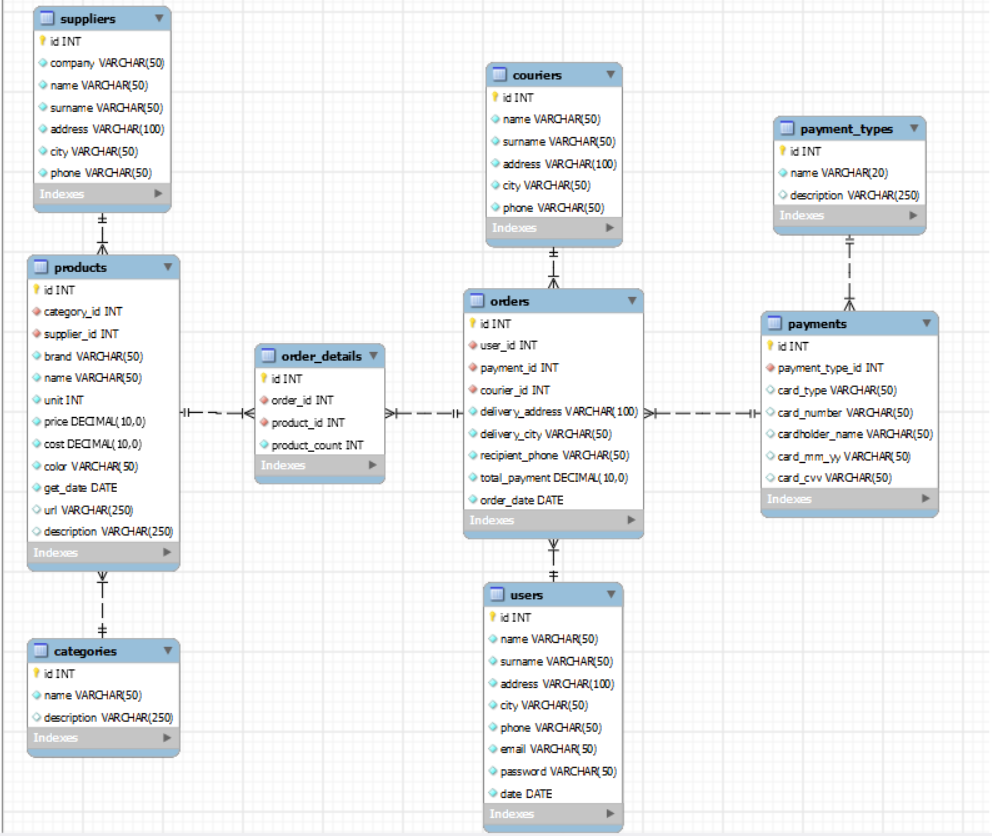